# Data Preparation (Firt Names)

https://www.ssa.gov/oact/babynames/limits.html

In this website, use `national data`. This zip file invovles first names from 1880 to 2021.

Aggregate by decades (10 years aggregation)

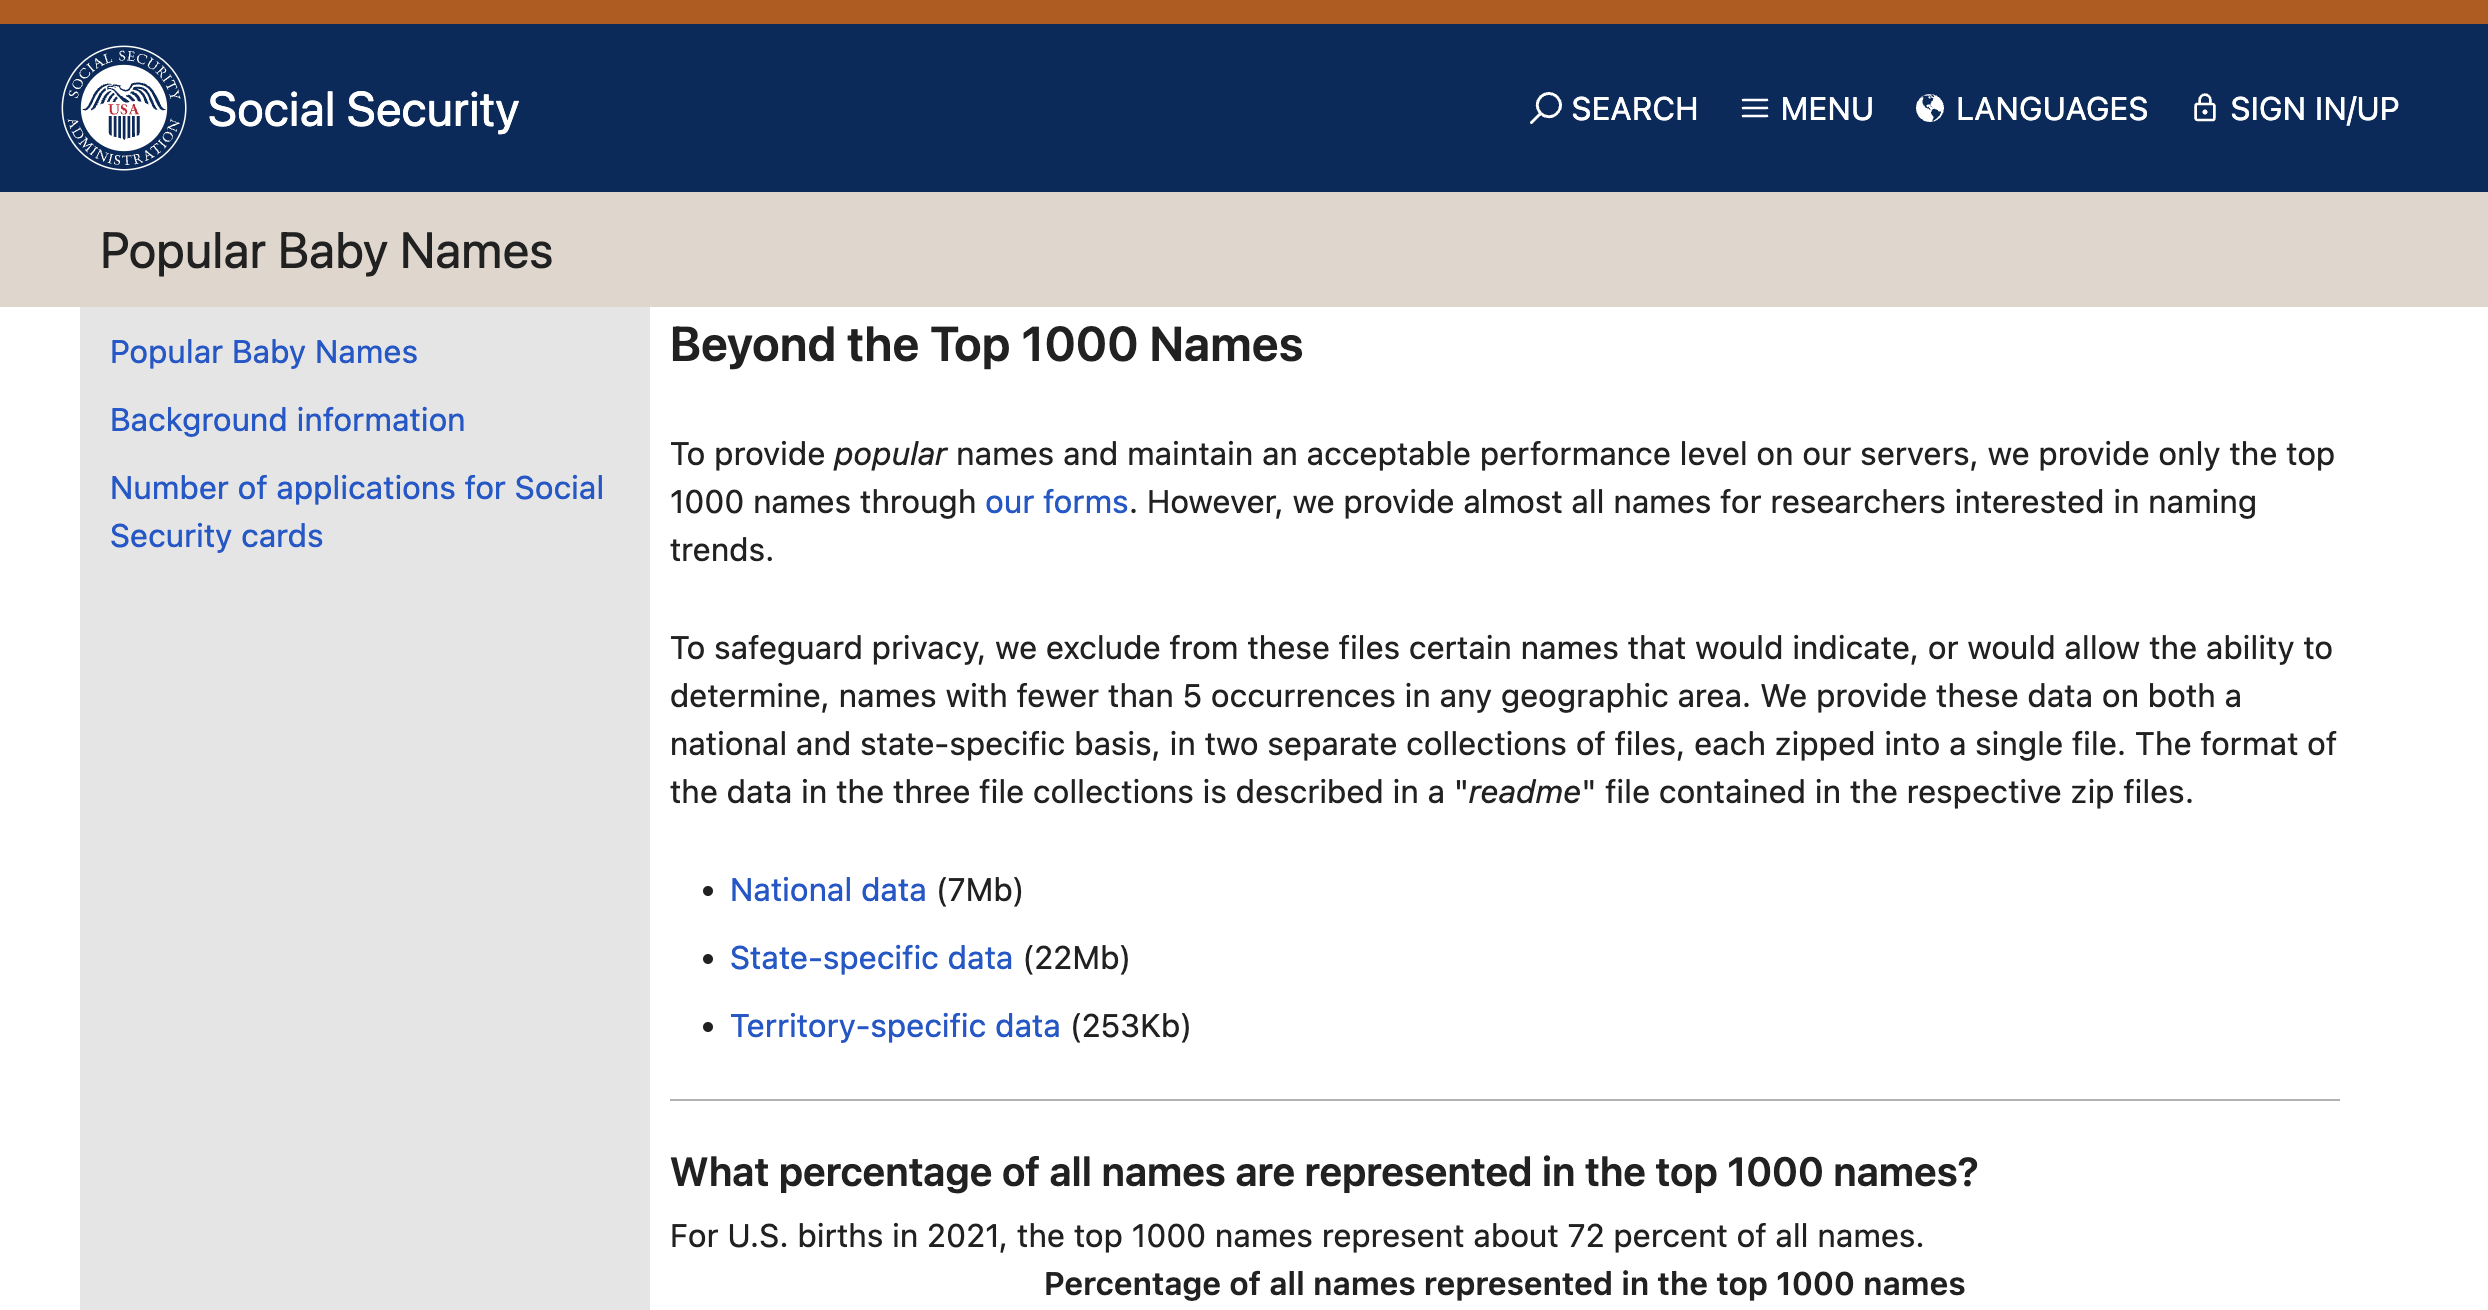

In [1]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import bz2
import pickle
import re

In [2]:
# --- define URL (zip file)
url = 'https://www.ssa.gov/oact/babynames/names.zip'

# --- output file name
file_name_output = 'first_names_decades.pbz2'

In [3]:
resp = urlopen(url)
zipfile = ZipFile(BytesIO(resp.read()))
file_names = zipfile.namelist()

yobYYYY.txt

Check year range

In [4]:
_file_names = []

for f in file_names:
    tmp = re.findall('[0-9]{4}', f)
    
    if len(tmp) > 0:
        _file_names.append( (int(tmp[0]), f))
        
print('min year:', min([v[0] for v in _file_names]))
print('max year:', max([v[0] for v in _file_names]))

min year: 1880
max year: 2021


In [5]:
year_start = 1880
year_end   = 2020

In [6]:
res = []

for year_start in range(year_start, year_end, 10):
    
    # --- 10 years accumulation
    _res_accumulated = []
    for _year in range(10):
        year = year_start + _year
        file_name = f'yob{year}.txt'
        with zipfile.open(file_name, 'r') as f:
            for line in f:
                tokens = line.decode().split(',')
                _res_accumulated.append(
                    {
                        'name': tokens[0].strip(),
                        'gender': tokens[1].strip(),
                        'count':int(tokens[2].strip()),
                        'year': year                        
                    }
                )
                
    # --- aggregation with concatenated keys (name + gender)
    df_acc = pd.DataFrame.from_dict(_res_accumulated, orient = 'columns')
    df_acc['name_gender'] = df_acc.name + '|' + df_acc.gender
    name_gender_counts = dict(df_acc.groupby(by = 'name_gender')['count'].sum())
    
    # --- 
    _res_agg = []
    for k,v in name_gender_counts.items():
        name, gender = k.split('|')
        _res_agg.append(
            {
                'name': name,
                'gender': gender,
                'count': v, 
                'year': year_start
            }
        )
    res.extend(_res_agg)
    

In [7]:
df = pd.DataFrame.from_dict(res, orient = 'columns')

In [8]:
len(df)

362987

In [9]:
with bz2.BZ2File(file_name_output, 'wb') as f:
    pickle.dump(df, f)

In [10]:
df.year.value_counts()

2000    60382
2010    60008
1990    50439
1980    38605
1970    31786
1960    22174
1950    18980
1920    18106
1940    16294
1930    15664
1910    15258
1900     6318
1890     5022
1880     3951
Name: year, dtype: int64

In [12]:
df[
    (df.year == 2010) & 
    (df.gender == 'M')
].sort_values(by = 'count', ascending = False).head()

,name,gender,count,year
346587,Noah,M,183076,2010
338856,Liam,M,173797,2010
326799,Jacob,M,163027,2010
359736,William,M,159773,2010
342273,Mason,M,157718,2010


https://www.ssa.gov/oact/babynames/decades/names2010s.html

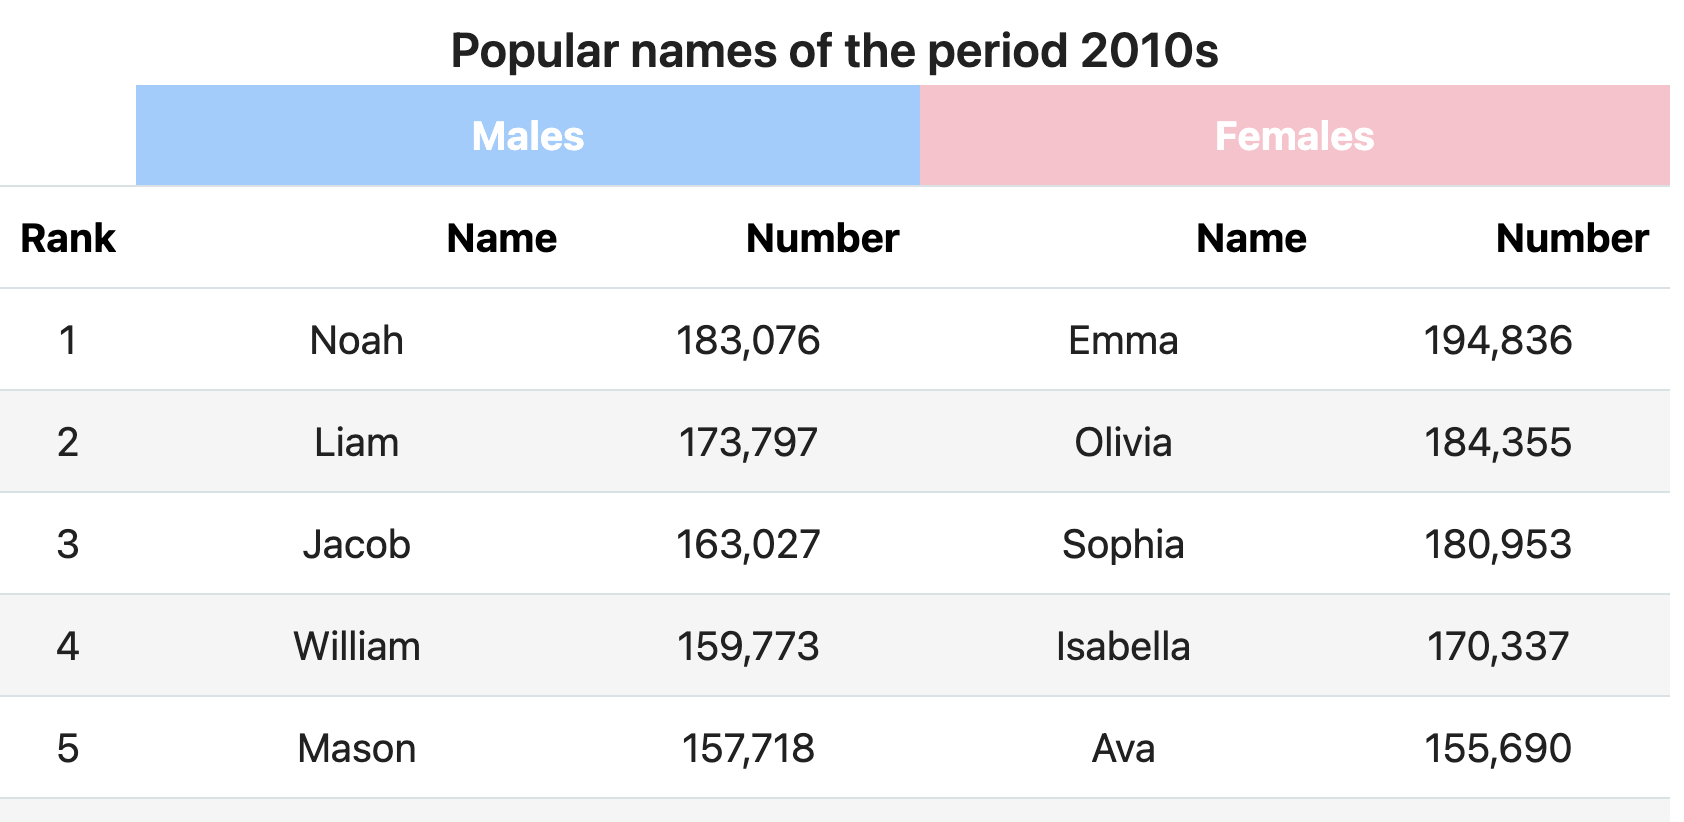